In [1]:
import yt
import numpy as np
import ipyvolume
import h5py # used for using brain-scan data (last week)

In [3]:
ds = yt.load('/Users/jillnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030')

yt : [INFO     ] 2020-04-27 09:45:56,343 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-04-27 09:45:56,343 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-04-27 09:45:56,344 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-04-27 09:45:56,345 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-04-27 09:45:56,345 Parameters: cosmological_simulation   = 0.0


We have to make a "scene" to do volume rendering (like in 3D graphics):

In [4]:
sc = yt.create_scene(ds, 'density')

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 10500.02it/s]
yt : [INFO     ] 2020-04-27 09:46:53,288 Gathering a field list (this may take a moment.)


In [5]:
print(sc)

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0. 0. 0.] cm, right_edge=[3.086e+24 3.086e+24 3.086e+24] cm transfer_function:None
Camera: 
    <Camera Object>:
	position:[1. 1. 1.] code_length
	focus:[0.5 0.5 0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[1.5 1.5 1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-866025.33679714 -866025.33679714 -866025.33679714] code_length


yt : [INFO     ] 2020-04-27 09:47:41,018 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-27 09:47:41,024 Creating volume
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1396: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-04-27 09:47:43,686 Creating transfer function
yt : [INFO     ] 2020-04-27 09:47:43,686 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


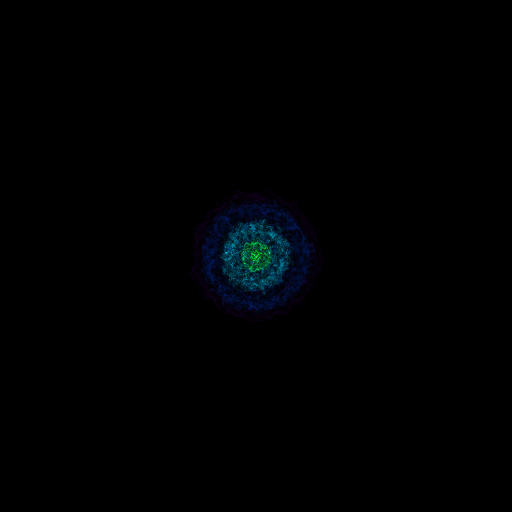

In [6]:
sc.show()

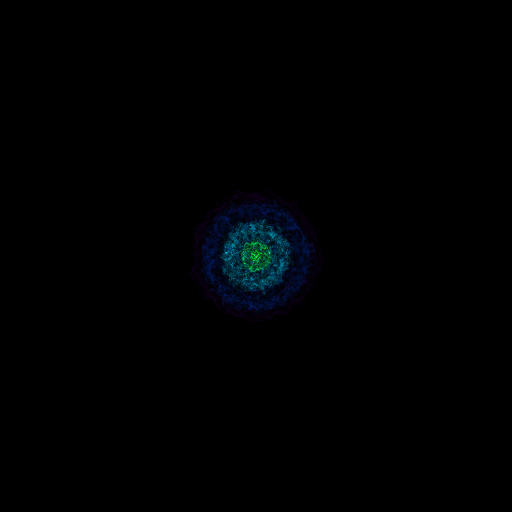

In [7]:
sc.camera.width = (300, 'kpc')
sc.show()

In [8]:
sc.camera.switch_orientation?

yt : [INFO     ] 2020-04-27 09:50:39,788 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-27 09:50:39,790 Creating volume
yt : [INFO     ] 2020-04-27 09:50:41,795 Creating transfer function
yt : [INFO     ] 2020-04-27 09:50:41,796 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


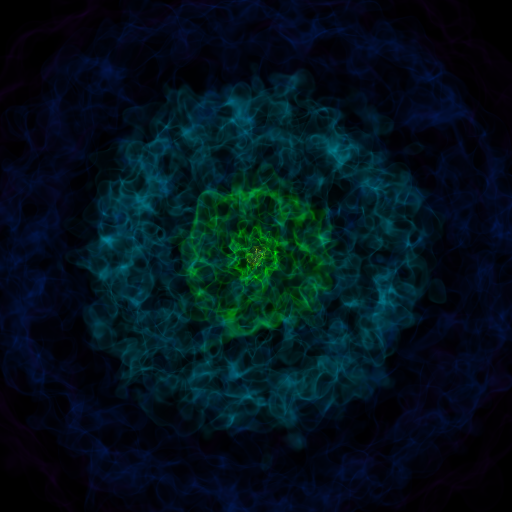

In [9]:
sc = yt.create_scene(ds, 'density') # create the scene
sc.camera.width = (300, 'kpc')
sc.camera.switch_orientation() # recalculates all important camera vectors
sc.show()

Just copying how we read in the brain scan data last time:

In [10]:
with h5py.File('/Users/jillnaiman/Downloads/single_dicom.h5', 'r') as f:
    scan_data = f['/scan'][:]

In [11]:
scan_data.shape

(36, 512, 512)

In [13]:
# translate into yt-object to use volume rendering
dsd = yt.load_uniform_grid({'scan': scan_data}, 
                          [36, 512, 512], 
                          length_unit = yt.units.cm, 
                          bbox = np.array([[0,10], [0,10], [0,10]]) )

yt : [INFO     ] 2020-04-27 09:53:39,422 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-04-27 09:53:39,423 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2020-04-27 09:53:39,424 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-04-27 09:53:39,424 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2020-04-27 09:53:39,425 Parameters: cosmological_simulation   = 0.0


In [14]:
dsd.field_list

[('stream', 'scan')]

yt : [INFO     ] 2020-04-27 09:54:15,820 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-27 09:54:15,823 Creating volume
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1396: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-04-27 09:54:16,412 Creating transfer function
yt : [INFO     ] 2020-04-27 09:54:16,413 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


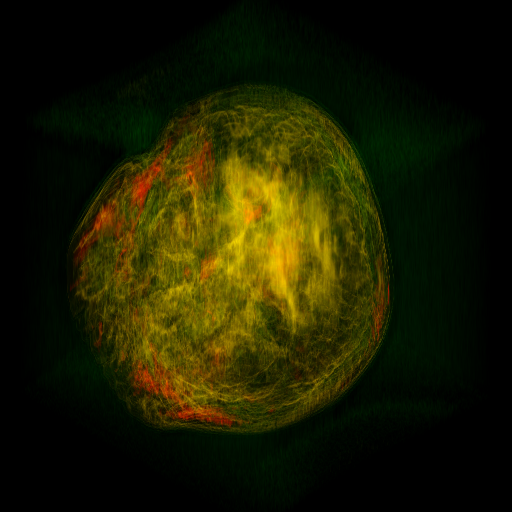

In [16]:
scd = yt.create_scene(dsd, 'scan')
scd.show()

In [17]:
sc.camera

<Camera Object>:
	position:[1. 1. 1.] code_length
	focus:[0.5 0.5 0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829] dimensionless
	width:[0.29996866 0.29996866 0.29996866] unitary
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-173186.5712339 -173186.5712339 -173186.5712339] code_length

yt : [INFO     ] 2020-04-27 09:56:11,678 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-27 09:56:11,685 Creating volume
yt : [INFO     ] 2020-04-27 09:56:11,944 Creating transfer function
yt : [INFO     ] 2020-04-27 09:56:11,945 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


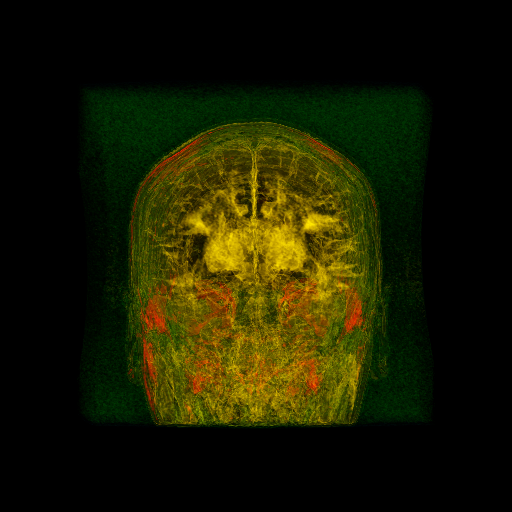

In [19]:
scd = yt.create_scene(dsd, 'scan')
scd.camera.position = [10, 0, 0]
scd.camera.north_vector = [0,-1,0]
scd.camera.switch_orientation()
scd.show()

In [20]:
ipyvolume.figure()
ipyvolume.volshow(scan_data) # directly from the scan data
ipyvolume.show()

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]